<a href="https://colab.research.google.com/github/nabrajko/CS_65/blob/master/Week_4_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import pandas as pd

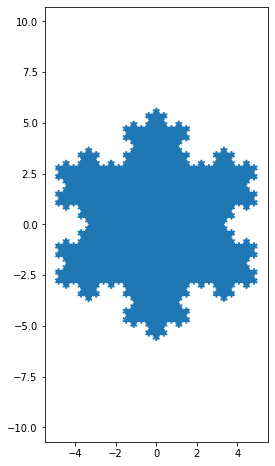

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y
x, y = koch_snowflake(order=5)

plt.figure(figsize=(4, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


In [0]:
plt.plot??

In [0]:
url = 'https://github.com/mattharrison/datasets/blob/master/data/alta-noaa-1980-2019.csv?raw=true'
alta = pd.read_csv(url)

In [0]:
alta

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,0.10,2.0,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,0.43,3.0,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,0.09,1.0,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,0.00,0.0,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,0.00,0.0,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,0.01,0.0,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,0.00,0.0,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,0.00,0.0,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,0.07,0.0,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
alta['DATE'] = pd.to_datetime(alta.DATE)

In [0]:
weekly = (alta
         .set_index("DATE")
         .resample('w')
         .agg({'LATITUDE':'first', 'LONGITUDE':'first', 'SNOW':'mean', 'SNWD':'mean',
               'TMAX':'max', 'TMIN':'min', 'TOBS': 'mean'})
        )
weekly

,LATITUDE,LONGITUDE,SNOW,SNWD,TMAX,TMIN,TOBS
DATE,,,,,,,
1980-01-06,40.5905,-111.6369,1.166667,30.500000,42.0,12.0,22.333333
1980-01-13,40.5905,-111.6369,9.000000,48.142857,33.0,-5.0,21.285714
1980-01-20,40.5905,-111.6369,4.857143,63.285714,40.0,15.0,23.000000
1980-01-27,40.5905,-111.6369,0.000000,57.000000,43.0,10.0,19.714286
1980-02-03,40.5905,-111.6369,5.714286,70.571429,38.0,-6.0,16.142857
...,...,...,...,...,...,...,...
2019-08-11,40.5905,-111.6369,0.000000,0.000000,78.0,42.0,69.000000
2019-08-18,40.5905,-111.6369,0.000000,0.000000,75.0,42.0,66.666667
2019-08-25,40.5905,-111.6369,0.000000,0.000000,76.0,45.0,67.000000


In [0]:
x = weekly.index
y = weekly.SNWD

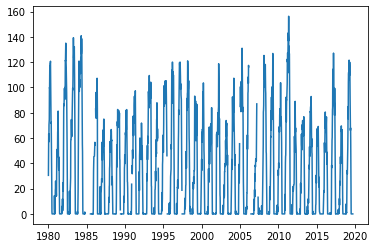

In [0]:
plt.plot(x, y)

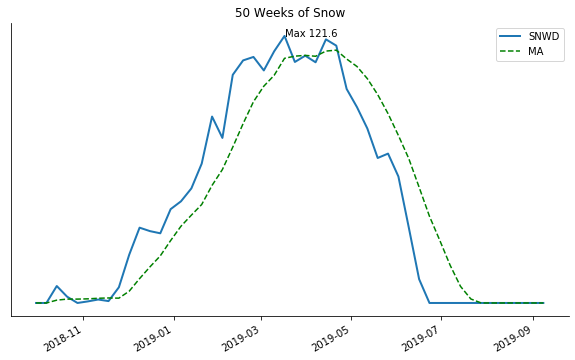

In [0]:
fig, ax = plt.subplots(figsize=(10,6))  # axes
weeks = 50
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
y_weeks_ma = y.rolling(6).mean().iloc[-weeks:]

max_val = max(y_weeks)
max_idx = y_weeks.idxmax()
ax.annotate(f'Max {max_val:.1f}', xy=(mdt.date2num(max_idx), max_val))

ax.plot(x_weeks, y_weeks, linewidth=2, label='SNWD')
ax.plot(x_weeks, y_weeks_ma, color='g', linestyle='--', label='MA')
ax.legend()

ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(f'{weeks} Weeks of Snow')
fig.autofmt_xdate()

In [0]:
fig.autofmt_xdate?